## 빅데이터 실습

### COVID19, 코로나 바이러스의 영향으로 중국인 관광객이 얼마나 줄었을까?

#### 데이터 수집
- 한국관광공사, [한국관광 데이터랩](https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do) 데이터
- 수집은 패스 

#### 데이터 로드 및 전처리
- 분석전에 제일 중요한 단계. 데이터 분석의 8할은 데이터 전처리다.
- Data Processing : 분석에 적합하도록 원하는(쉬운) 형태로 데이터를 가공하는 과정
    - 결측치 처리(None, Null, Nan) 처리, 이상치 처리, 변수 정규화, 파생변수 생성

#### 엑셀 파일 로드

In [101]:
# 판다스 사용등록
import pandas as pd

In [102]:
kto_201901 = pd.read_excel('./data/kto_201901.xlsx',header=1,usecols='A:G',skipfooter=4)
kto_201901

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570
...,...,...,...,...,...,...,...
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526


In [103]:
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570


In [104]:
kto_201901.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526
66,교포,0,0,0,0,15526,15526


#### 데이터 탐색(전처리를 위한)

In [105]:
# DF 각 정보개요
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [106]:
# DF의 각 통계치
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [107]:
# 한번도 한국에 방문한 적이 없는 대륙, 나라(목적별)
# 문자열 여러줄, 논리연산 여러줄 작성시는 \ 붙여줌
condition = (kto_201901['관광']==0) | (kto_201901['상용']==0) | (kto_201901['공용']==0) | (kto_201901['유학/연수']==0)

In [108]:
##cmap
```
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 
'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 
'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 
'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 
'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 
'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 
'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 
'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 
'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 
'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 
'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 
'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'
```
kto_201901[condition]
kto_201901.style.background_gradient(axis=None, vmin=0, vmax=200_000, cmap='YlGnBu')

SyntaxError: invalid syntax (3849730669.py, line 2)

In [ ]:
## 2. 기준년월 추가
kto_201901['기준년월'] = '2019-01'
kto_201901

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
...,...,...,...,...,...,...,...,...
62,아프리카 기타,768,718,90,206,908,2690,2019-01
63,기타대륙,33,4,0,1,16,54,2019-01
64,국적미상,33,4,0,1,16,54,2019-01
65,교포소계,0,0,0,0,15526,15526,2019-01


In [ ]:
## 국적데이터만 추출
kto_201901['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [ ]:
## 8개밖에 안되는 데이터를 뽑아내려고 코딩하는 것은 멍청한 짓
for item in kto_201901['국적']:
    if item.strip()[-1] == '주':
        print(item)

아시아주
미주
구주
대양주
아프리카주


In [ ]:
## 대륙리스트
continent_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
continent_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [ ]:
## 대륙을 뺀 국적리스트 일단보류
kto_201901['국적']

0        아시아주
1          일본
2          대만
3          홍콩
4         마카오
       ...   
62    아프리카 기타
63       기타대륙
64       국적미상
65       교포소계
66         교포
Name: 국적, Length: 67, dtype: object

In [ ]:
kto_201901.국적

0        아시아주
1          일본
2          대만
3          홍콩
4         마카오
       ...   
62    아프리카 기타
63       기타대륙
64       국적미상
65       교포소계
66         교포
Name: 국적, Length: 67, dtype: object

In [ ]:
## 대륙 외 국적들만 뽑아내기
condition = (kto_201901['국적'].isin(continent_list) == False)
kto201901_countries = kto_201901[condition]
kto201901_countries['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [ ]:
# 중간에 비는 인덱스없이 다시 지정, inplace=True 기존 데이터를 대체해줌
kto201901_countries.reset_index(drop=True,inplace=True)

In [ ]:
## 대륙컬럼을 추가 사전작업
for i in continent_list:
    print(i)

아시아주
미주
구주
대양주
아프리카주
기타대륙
교포소계


In [ ]:
# 대륙 리스트 재구성
continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 +['아프리카']*2 +['기타대륙']+['교포']

In [ ]:
## SettingWithCopyWarning 해제하는 법
pd.set_option('mode.chained_assignment', None)

In [ ]:
# 국적간 데이터 DF 마지막에 대륙컬럼 추가
kto201901_countries['대륙'] = continents
kto201901_countries

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,NaN
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,96.3
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,96.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,97.5
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,82.3
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아,86.3
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아,46.9
8,싱가포르,8372,94,8,48,1333,9855,2019-01,아시아,75.3
9,미얀마,1304,10,31,67,3877,5289,2019-01,아시아,85.0


In [ ]:
## 국적별 관광객 비율
kto201901_countries['관광객비율(%)'] = round(kto2019_countries['관광'] / kto2019_countries['계'] * 100,1)

In [ ]:
kto2019_countries 

In [ ]:
## 관광객 비율이 높은 나라 Top5
kto201901_countries.sort_values(by='관광객비율(%)',ascending=True).head(6)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
15,캄보디아,635,39,55,51,1915,2695,2019-01,아시아,11.9
13,파키스탄,238,178,10,193,413,1032,2019-01,아시아,12.2
14,방글라데시,149,126,27,97,848,1247,2019-01,아시아,23.1
16,몽골,8358,77,304,484,562,9785,2019-01,아시아,23.6
10,베트남,10739,763,110,1667,6904,20183,2019-01,아시아,24.7
49,루마니아,412,8,4,3,445,872,2019-01,유럽,26.2


In [ ]:
## 관광객 비율 평균 pivot_table
kto201901_countries.pivot_table(values = '관광객비율(%)',index='대륙',aggfunc='mean')

,관광객비율(%)
대륙,
교포,90.400000
기타대륙,74.500000
아메리카,59.125000
아시아,60.679167
아프리카,89.600000
오세아니아,50.200000
유럽,66.190909


In [ ]:
## 중국만 필터링
condition = kto201901_countries['국적'] == '중국'
kto201901_countries[condition]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,85.4


In [ ]:
## 전체 외국인 관광객 수
totalSum = sum(kto201901_countries['관광'])

In [ ]:
## 전체비율(%) 계산
kto201901_countries['전체비율(%)'] = round(kto201901_countries['관광'] / totalSum * 100, 1)

In [ ]:
kto201901_countries.sort_values(by='전체비율(%)',ascending=False).head(10)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,85.4,36.2
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,NaN,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,96.3,9.8
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,34.3,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,98.2,3.9
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,97.5,3.8
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,82.3,2.2
47,러시아,17260,181,37,191,7525,25194,2019-01,유럽,48.0,2.0
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아,86.3,1.6
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아,46.9,1.6


In [ ]:
## 125개 데이터를 전부 확인 불가
## 샘플링 조회
kto_201509 = pd.read_excel('./data/kto_201509.xlsx',header=1,usecols='A:G',skipfooter=4)
kto_201509.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


##### 종합
- 위에서 하나의 엑셀로 처리한 방식을 반복문을 통해서 전체 125개 데이터를 통합하는 작업
- 1~7까지의 작업을 하나의 함수로 생성

In [ ]:
## 년월별 데이터 전처리 함수 
def createKtoData(yyyy,mm):
    # 1. 엑셀파일 지정
    filePath = f'./data/kto_{yyyy}{mm:02d}.xlsx' # mm이 1~9 들어오면 01~09로 변경해줘야함
    # 2. 엑셀파일 불러오기
    df = pd.read_excel(filePath,header=1,usecols='A:G',skipfooter=4)
    # 3. 기준년월 컬럼 추가
    df['기준년월'] = f'{yyyy}-{mm:02d}' # mm이 1~9 들어오면 01~09로 변경해줘야함
    # 2. 엑셀파일 불러오기
    # 4. 국적컬럼 대륙제거 국가만 추출
    ignore_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
    # 대륙제거
    condition = ( df['국적'].isin(ignore_list) == False )
    df_countries = df[condition].reset_index(drop=True)
    ## 5. 대륙컬럼추가
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 +['아프리카']*2 +['기타대륙']+['교포']
    df_countries['대륙'] = continents
    ## 6. 국적별 관광객비율 컬럼추가
    df_countries['관광객비율(%)'] = round(df_countries['관광'] / df_countries['계'] * 100,1)
    ## 7. 전체 비율 컬럼추가
    totalSum = sum(df_countries['관광'])
    df_countries['전체비율(%)'] = round(df_countries['관광']/ totalSum * 100,1)
    ## 8. 결과리턴
    return(df_countries)


In [ ]:
## 테스트
df_test = createKtoData(2011,5)
df_test

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,229017,1614,58,274,3663,234626,2011-05,아시아,97.6,42.7
1,대만,27611,93,1,44,852,28601,2011-05,아시아,96.5,5.2
2,홍콩,18603,52,0,12,722,19389,2011-05,아시아,95.9,3.5
3,마카오,448,0,0,0,3,451,2011-05,아시아,99.3,0.1
4,태국,20690,50,9,18,5326,26093,2011-05,아시아,79.3,3.9
5,말레이시아,10265,91,2,29,1666,12053,2011-05,아시아,85.2,1.9
6,필리핀,8178,227,64,36,20542,29047,2011-05,아시아,28.2,1.5
7,인도네시아,4419,542,9,20,4706,9696,2011-05,아시아,45.6,0.8
8,싱가포르,7015,168,1,22,1276,8482,2011-05,아시아,82.7,1.3
9,미얀마,1125,40,1,3,4570,5739,2011-05,아시아,19.6,0.2


In [ ]:
## 반복문으로 기준년월 출력
for yyyy in range(2010,2021):
    for mm in range(1,13):
        print(yyyy,mm)

2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020


##### tqdm 라이브러리
프로그레스바

In [ ]:
!pip install tqdm

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     --------------------------- ---------- 41.0/57.6 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 599.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB 4.3 MB/s eta 0:00:00


In [ ]:
from tqdm import tqdm
import time

In [ ]:
text = ''
strList = ['H','e','l','l','o','','p','y','t','h','o','n']
for char in tqdm(strList):
    text = text + char
    time.sleep(0.5)

  0%|          | 0/12 [00:00<?, ?it/s]

100%|██████████| 12/12 [00:06<00:00,  1.99it/s]


In [ ]:
## 빈 DF
df_total = pd.DataFrame()

In [ ]:
for yyyy in tqdm(range(2010,2021)):
    for mm in range(1,13):
        try:
            temp = createKtoData(yyyy, mm)
            df_total = pd.concat([df_total,temp], ignore_index=True)
        except:
            pass

100%|██████████| 11/11 [00:03<00:00,  3.37it/s]


In [ ]:
## 결과보기
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7500 non-null   object 
 1   관광        7500 non-null   int64  
 2   상용        7500 non-null   int64  
 3   공용        7500 non-null   int64  
 4   유학/연수     7500 non-null   int64  
 5   기타        7500 non-null   int64  
 6   계         7500 non-null   int64  
 7   기준년월      7500 non-null   object 
 8   대륙        7500 non-null   object 
 9   관광객비율(%)  7500 non-null   float64
 10  전체비율(%)   7500 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 644.7+ KB


In [ ]:
## 파일저장
df_total.to_excel('./data/kto_total.xlsx', index=False)

In [ ]:
## 중국국적 데이터만 추출
condition = df_total['국적'] == '중국'

In [ ]:
df_china = df_total[condition]

#### 데이터 시각화/분석
분석 먼저하고 시각화할 수도 있고, 시각화한 지표로 분석할 수도

In [ ]:
df_china.reset_index(inplace=True)

In [ ]:
df_china

,index,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
1,77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
2,137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
3,197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
4,257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
120,7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,38.2
121,7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,9.8
122,7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,16.0
123,7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.3,10.2


#### Matplotlib 시각화
- 필요라이브러리 가져오기
- 한글 깨짐현상 해결

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf'  #나눔고딕코딩체 사용
font = font_manager.FontProperties(fname=font_path).get_name()  #실제 설치된 폰트 이름 조회
rc('font', family=font) #한글 깨짐 현상 해결
rcParams['axes.unicode_minus'] = False  #한글 사용 시 마이너스 깨짐

In [ ]:
# 차트스타일 지정
sns.set_style('darkgrid')

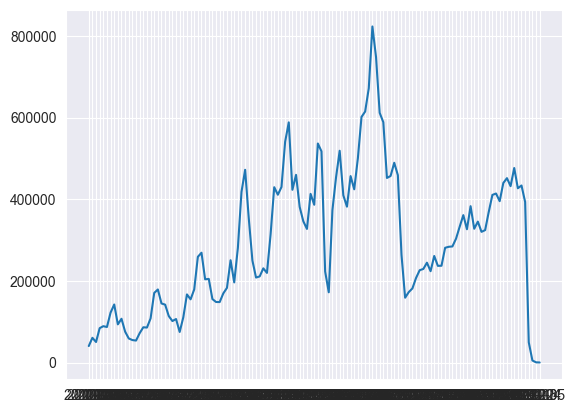

In [ ]:
plt.plot(df_china['기준년월'], df_china['관광'])
plt.show()

In [ ]:
# list comprehension
[f'{i}-01' for i in range(2010,2021)]

['2010-01', '2011-01', '2012-01']

In [ ]:
for i in range(2010,2021):
    print(f'{i}-01')

2010-01
2011-01
2012-01
2013-01
2014-01
2015-01
2016-01
2017-01
2018-01
2019-01
2020-01


In [ ]:
## 불필요한 경고메시지 제거
import warnings
warnings.filterwarnings('ignore')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5236\3530124314.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{x:,.0f}' for x in current_values])


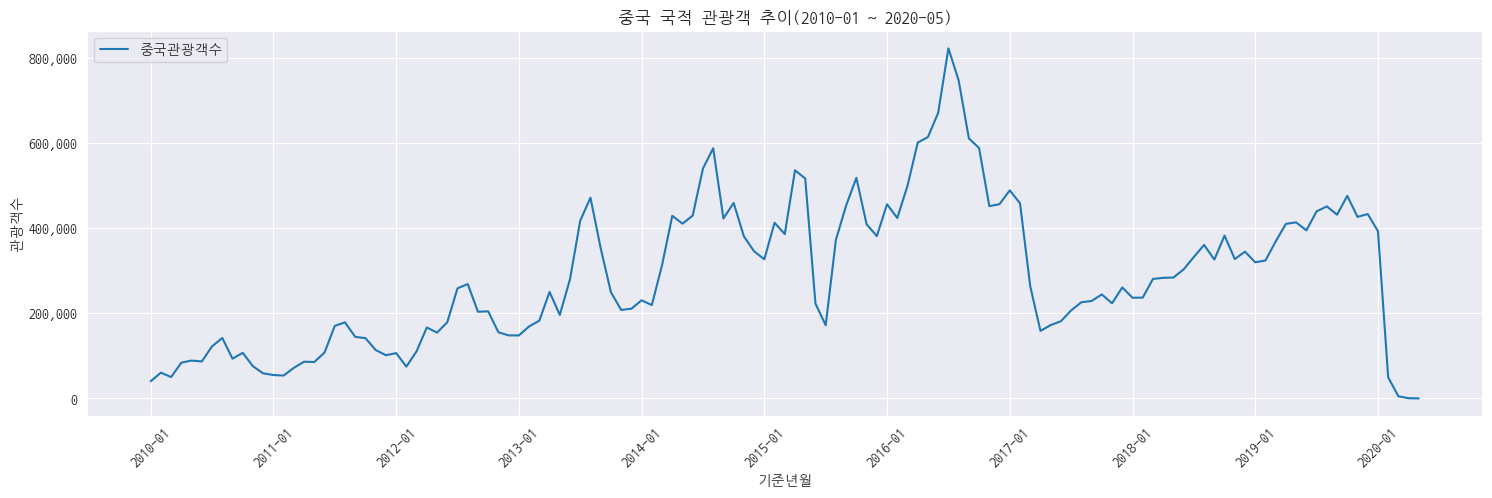

In [ ]:
## 예쁘게 위의 데이터 출력차트 변경
## 그래프 크기 조절
plt.figure(figsize=(18, 5)) # w:18, h:5
## 차트 그릴 내용
plt.plot(df_china['기준연월'], df_china['관광'], label='중국관광객수', color='r', linestyle=':', marker='o')
## 타이틀, 라벨, 범례
plt.title('중국 국적 관광객 추이(2010-01~2020-05)')
plt.xlabel('기준연월')
plt.ylabel('관광객수')
plt.legend(loc='upper left')
# plt.xticks(rotation=90)   # x축 라벨 90도 회전
## x축 라벨
plt.xticks([f'{i}-01' for i in range(2010, 2021)])
## y출 라벨(1000단위 쉼표)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{x:,.0f}' for x in current_values])
plt.show()

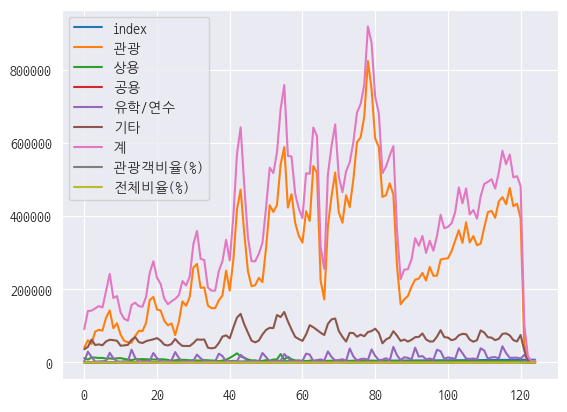

In [ ]:
## 판다스 DF 을 자동으로 차트를 만들어주는 것
df_china.plot()
plt.show()